In [1]:
## import packages to use for importing, cleaning, and graphing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## import nfl salary data as nfl_salary
nfl_salary = pd.read_csv("C:/Users/camer/Desktop/nfl_salary.txt", delimiter = '\t')

This data can be used to compare salaries across different positions in the NFL. It will be
interesting to determine what position makes the most money on average and which positions have the most variation or widest 
range of salaries.

In [3]:
## view the top few rows of nfl_salary to make sure it read in correctly
nfl_salary.head()

,year,Cornerback,Defensive Lineman,Linebacker,Offensive Lineman,Quarterback,Running Back,Safety,Special Teamer,Tight End,Wide Receiver
0,2011,11265916,17818000,16420000,15960000,17228125.0,12955000,8871428,4300000.0,8734375,16250000
1,2011,11000000,16200000,15623000,12800000,16000000.0,10873833,8787500,3725000.0,8591000,14175000
2,2011,10000000,12476000,11825000,11767500,14400000.0,9479000,8282500,3556176.0,8290000,11424000
3,2011,10000000,11904706,10083333,10358200,14100000.0,7700000,8000000,3500000.0,7723333,11415000
4,2011,10000000,11762782,10020000,10000000,13510000.0,7500000,7804333,3250000.0,6974666,10800000


Data in long format is typically easier to read, so I want to change the dataframe to contain only 3 variables: year, position, and salary. Each row will correspond to a different player, showing the year the observation was recorded and the player's position and salary.

In [4]:
## use melt function to change the column names to a new variable 'position', with corresponding salary values
nfl_salary = pd.melt(nfl_salary, id_vars = ['year'], value_vars = nfl_salary[['Cornerback', 'Defensive Lineman', 'Linebacker',
                                                            'Offensive Lineman', 'Quarterback', 'Running Back', 'Safety',
                                                            'Special Teamer', 'Tight End', 'Wide Receiver']],
               var_name = 'Position', value_name = 'Salary')

In [5]:
## make sure pd.melt performed correctly
nfl_salary.head()

,year,Position,Salary
0,2011,Cornerback,11265916.0
1,2011,Cornerback,11000000.0
2,2011,Cornerback,10000000.0
3,2011,Cornerback,10000000.0
4,2011,Cornerback,10000000.0


I'll check for outliers and missing values to make sure the data is clean and organized before starting analysis and exploration.

In [6]:
## getting simple summary statistics of the salary variable and changing from scientific notation so it's easier to read
nfl_salary_description = nfl_salary['Salary'].describe()
pd.to_numeric(nfl_salary_description, downcast = 'float')

count        7944.00
mean      3487881.00
std       3628404.25
min         24705.00
25%        885000.00
50%       2266250.00
75%       4620379.00
max      37000000.00
Name: Salary, dtype: float32

It doesn't look like there are any crazy outliers in the data, although the minimum salary of 24,705 looks suspicious. I want to compare minimum values across all positions.

In [7]:
## find the minimum salary by position
nfl_salary.groupby('Position')['Salary'].min()

Position
Cornerback            600000.0
Defensive Lineman    1400000.0
Linebacker           1243687.0
Offensive Lineman    1873750.0
Quarterback            24705.0
Running Back          455125.0
Safety                555000.0
Special Teamer        128824.0
Tight End             371824.0
Wide Receiver         655812.0
Name: Salary, dtype: float64

I think that the 24,705 is an outlier since none of the other positions have a minimum salary below 125,000.

I want to view the distribution of quarterback salaries and see if there are other salaries near 24,705, or if it should be removed. The other possibility is that there was an error when inputing the data and a zero got left off the end.

In [8]:
## create all_qbs, which contains all quarterback observations in ascending order by salary
all_qbs = nfl_salary.loc[(nfl_salary.Position == 'Quarterback')].sort_values('Salary')
all_qbs.head()

,year,Position,Salary
3588,2014,Quarterback,24705.0
3896,2017,Quarterback,27353.0
3794,2016,Quarterback,30882.0
3492,2013,Quarterback,32647.0
3587,2014,Quarterback,33529.0


It looks like the minimum quarterback salary of 24,705 is not an outlier judging by the all_qbs data, but I want to plot a density plot to be sure.

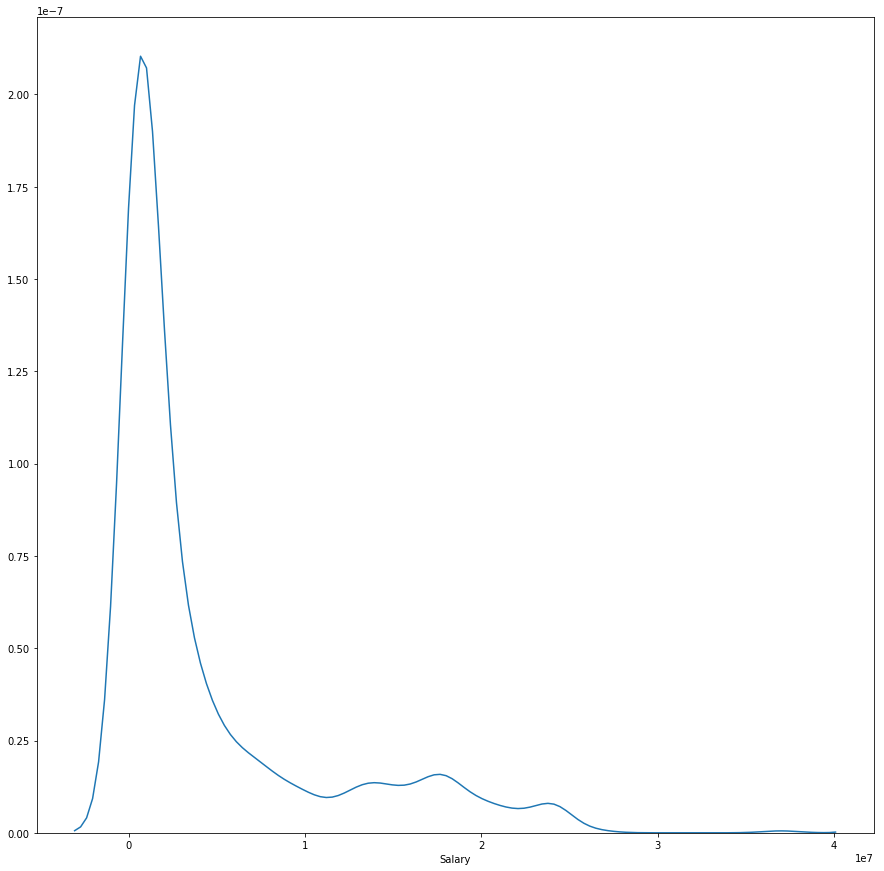

In [9]:
## create a larger figure for the plot to fill, create a density plot of quarterback salaries
plt.subplots(figsize = (15, 15))
sns.distplot(all_qbs.Salary[all_qbs.Salary.notna()], hist = False)

The distribution of quarterback salaries is very right skewed, and the minimum quarterback salary is close to the location where most of the data is clustered, so I will leave the observation in the data.

Next, I want to check for missing data.

In [10]:
## using .info to view variables and types. 
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      7944 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


In [11]:
## check how many unique observations there are for each position
pd.value_counts(nfl_salary['Position'])

Tight End            800
Special Teamer       800
Linebacker           800
Safety               800
Wide Receiver        800
Quarterback          800
Running Back         800
Defensive Lineman    800
Offensive Lineman    800
Cornerback           800
Name: Position, dtype: int64

In [12]:
## check how many unique observations there are per year
pd.value_counts(nfl_salary['year'])

2015    1000
2011    1000
2018    1000
2014    1000
2017    1000
2013    1000
2016    1000
2012    1000
Name: year, dtype: int64

It looks like the data is spread evenly over all positions and all years. However, when examining the output of the .info call, it looks like the salary column has fewer observations than the others, which means it probably has missing values. I want to examine these missing values and decide whether to drop the observations with missing data or input values.

In [13]:
## using .isnull to index out any columns that have null values
nfl_salary.columns[nfl_salary.isnull().any()]

Index(['Salary'], dtype='object')

The above code confirms that the salary variable has missing values.

In [14]:
## view the rows from nfl_salary that contain missing values 
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary
3297,2011,Quarterback,NaN
3298,2011,Quarterback,NaN
3299,2011,Quarterback,NaN
3388,2012,Quarterback,NaN
3389,2012,Quarterback,NaN
3390,2012,Quarterback,NaN
3391,2012,Quarterback,NaN
3392,2012,Quarterback,NaN
3393,2012,Quarterback,NaN
3394,2012,Quarterback,NaN


It looks like the majority of players with missing salaries are Quarterbacks, with one special teams player. I'm going to input the average special teamer player salary in 2011 for the special teamer missing a salary, since it's only one value and likely wouldn't have changed the overall average and distribution of special teamer salaries by a large amount (there are 800 observations for each position). I'm only using the average in 2011 in case special teamer salaries have changed over time.

In [15]:
## filter the nfl_salary dataframe for special teams players in 2011, then calculate the mean salary for those players and
## assign it to spec_team_mean. Use np.nanmean to ignore missing values.
sp_teamers_11 = nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & (nfl_salary.year == 2011)]
spec_team_mean = np.nanmean(sp_teamers_11.Salary)

In [16]:
## replace the missing salary for the special teams player with the previously calculated mean
nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & 
               (nfl_salary.year == 2011) &
               (nfl_salary.Salary.isnull()), 'Salary'] = spec_team_mean

Now to deal with the missing salaries for quarterbacks. I want to determine whether it would be appropriate to replace the missing quarterback salaries with the average quarterback salary for a given year.

In [17]:
## get the null salary values, group them by year, and count how many quarterbacks in each year have a missing salary
nfl_salary[nfl_salary.isnull().any(axis = 1)].groupby('year').count()

,Position,Salary
year,,
2011,3,0
2012,12,0
2013,7,0
2014,11,0
2015,3,0
2016,5,0
2017,3,0
2018,11,0


In [18]:
## find how many quarterback observations there are in 2012
nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & (nfl_salary.year == 2012)].shape

(100, 3)

Since there are 100 observations containing quarterback salary info in 2012, I think it would be appropriate to input the average 2012 quarterback salary for the missing quarterback salary values in 2012. Since there are an equal number of observations in each year and 2012 has the most missing salary values, I will replace missing quarterback salary values in a given year with that year's average quarterback salary. This should eliminate all missing values in my data.

In [19]:
## create all_years which contains every year in the nfl_salary data
all_years = nfl_salary.year.unique()

In [20]:
## create a for loop which filters for quarterbacks in each year and replaces missing salary values for a given year with the
## average quarterback salary for that year
for i in all_years:
    qbs_in_year = nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & (nfl_salary.year == i)]
    qb_mean = np.nanmean(qbs_in_year.Salary)
    nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & 
               (nfl_salary.year == i) &
               (nfl_salary.Salary.isnull()), 'Salary'] = qb_mean

In [21]:
## double check that all missing values have been replaced
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary


In [22]:
## triple check that all missing values have been replaced
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      8000 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


Now that the data is clean and there are no missing values, I'm going to create some summary statistics and graphs to answer
some questions of interest. Which position has the highest average salary? The highest median salary? Which position has the widest range of salaries?

In [23]:
## calculate the mean salary by position for each year, convert data to make it easier to read
avg_sals = nfl_salary.groupby('Position')[['Position', 'Salary']].mean().sort_values('Salary')
pd.to_numeric(avg_sals['Salary'], downcast = 'float')

Position
Special Teamer       1353947.000
Running Back         1937491.875
Tight End            1964607.750
Safety               2542319.500
Cornerback           3607020.750
Wide Receiver        3904309.250
Linebacker           4488940.500
Quarterback          4525761.500
Defensive Lineman    5277673.000
Offensive Lineman    5348530.000
Name: Salary, dtype: float32

In [24]:
## calculate the median salary by position for each year
nfl_salary.groupby('Position')[['Position', 'Salary']].median().sort_values('Salary')

,Salary
Position,
Running Back,834569.5
Tight End,837913.0
Special Teamer,900000.0
Safety,1597381.5
Quarterback,1743750.0
Cornerback,2235577.0
Wide Receiver,2600000.0
Linebacker,3431139.0
Defensive Lineman,4145908.0


In [25]:
## find the maximum salary by position
nfl_salary.groupby('Position')['Salary'].max()

Position
Cornerback           20000000.0
Defensive Lineman    26100000.0
Linebacker           22100000.0
Offensive Lineman    17545000.0
Quarterback          37000000.0
Running Back         15400000.0
Safety               13000000.0
Special Teamer        5250000.0
Tight End            12262000.0
Wide Receiver        20558000.0
Name: Salary, dtype: float64

In [26]:
## find the minimum salary by position
nfl_salary.groupby('Position')['Salary'].min()

Position
Cornerback            600000.0
Defensive Lineman    1400000.0
Linebacker           1243687.0
Offensive Lineman    1873750.0
Quarterback            24705.0
Running Back          455125.0
Safety                555000.0
Special Teamer        128824.0
Tight End             371824.0
Wide Receiver         655812.0
Name: Salary, dtype: float64

It looks like Offensive Lineman get paid the highest average and median salary. Let's see how the different positions' average salaries look over time.

In [27]:
## create nfl_salary2, which aggregates the salary values for each position in each year to the average salary, 
## making the positions into columns and leaving the year as the index
nfl_salary2 = nfl_salary.pivot_table(values = 'Salary', index = 'year', columns = 'Position', aggfunc = np.mean)

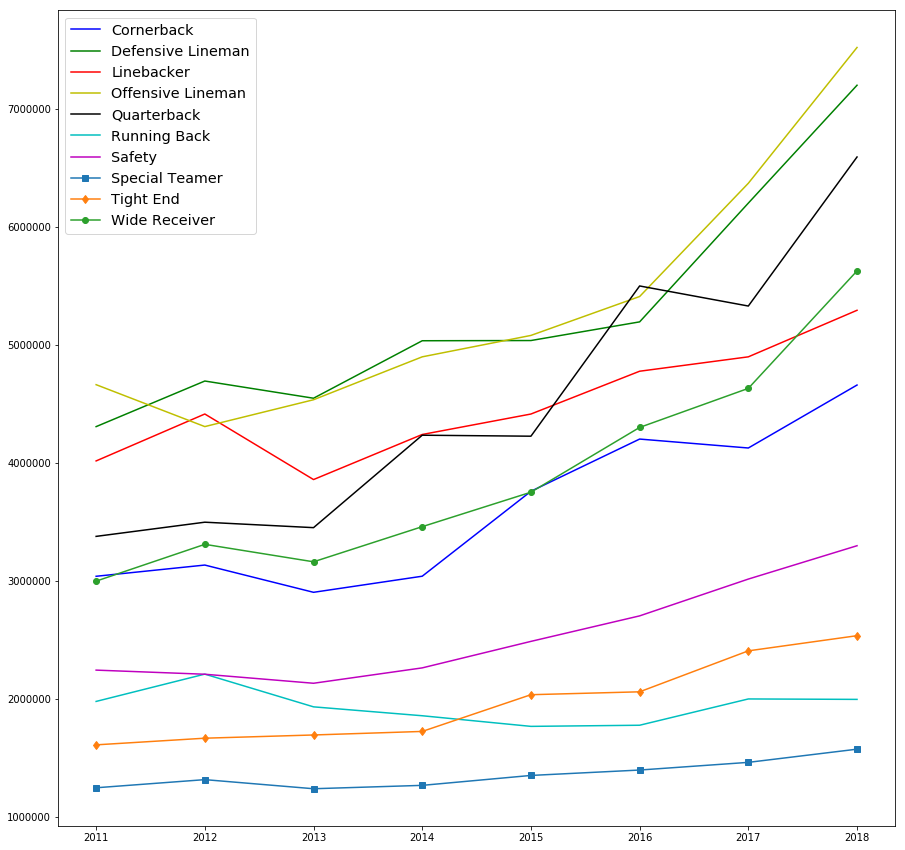

In [28]:
## use plt.subplots to create larger space for plot to fill
## create pos_columns, which contains the column names of nfl_salary2
## create pos_colors, which contains each position name and the corresponding color/line type to plot it as
## create for loop which plots a line plot for each position's average salary over time
## format the legend using plt.legend
plt.subplots(figsize = (15, 15))
pos_columns = list(nfl_salary2)
pos_colors = {'Cornerback':'b-', 'Defensive Lineman':'g-', 'Linebacker':'r-', 'Offensive Lineman':'y-', 
              'Quarterback':'k-','Running Back':'c-', 'Safety':'m-', 'Special Teamer':'s-',
              'Tight End':'d-', 'Wide Receiver':'o-'}
for pos in pos_columns:
    plt.plot(nfl_salary2.index, nfl_salary2[pos], pos_colors[pos], label = pos)
plt.legend(loc = 'best', fontsize = 'x-large')

The average salary for most positions have been increasing over the past 8 years. However, the average salary for running backs
has decreased. Could this reflect less value being placed on running backs and increased value being placed on tight ends and 
wide receivers? That question may be answerable using the next dataset that I analyze.

I also want to see which positions have the most variability in their salary levels. 

[Text(0,0,'Cornerback'),
 Text(0,0,'Defensive Lineman'),
 Text(0,0,'Linebacker'),
 Text(0,0,'Offensive Lineman'),
 Text(0,0,'Quarterback'),
 Text(0,0,'Running Back'),
 Text(0,0,'Safety'),
 Text(0,0,'Special Teamer'),
 Text(0,0,'Tight End'),
 Text(0,0,'Wide Receiver')]

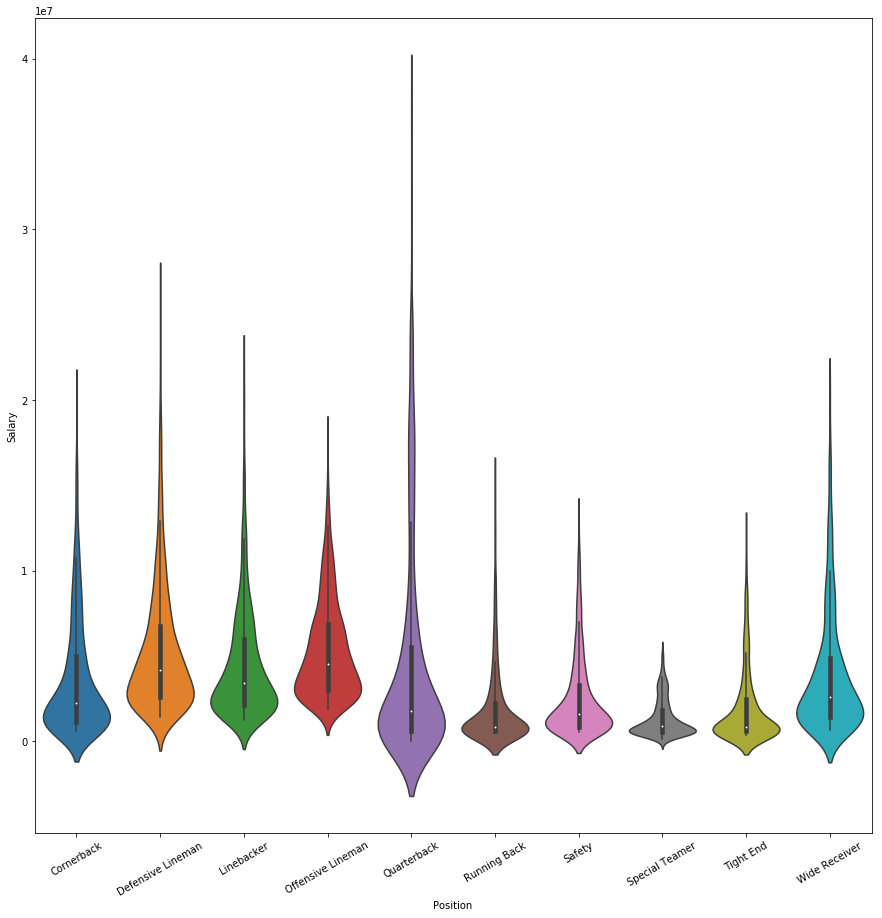

In [29]:
## create violin plot showing the distribution of salaries by position
plt.subplots(figsize = (15, 15))
pos_viol = sns.violinplot(x = 'Position', y = 'Salary', data = nfl_salary, scale = 'width')
pos_viol.set_xticklabels(pos_viol.get_xticklabels(), rotation=30)

Offensive lineman have the highest salary on average, but quarterbacks in the NFL have the most potential for making a lot of money. Every position has a salary distribution that is very right skewed.

Quarterbacks by far have the widest distribution of salaries, containing the highest and the lowest salaries in the whole dataset with a max of 37,000,000 and a minimum of 24,705.

Overall, the average salaries for players in the NFL have been increasing during the past 8 years for every position except running backs. Playing offensive line is the most likely scenario that will fetch you the highest salary on average. Defensive lineman and quarterbacks have had very similar trends in salary, although there is huge earning potential as a quarterback. Running back salaries have been stagnant, and in the future I would be curious to see if special team player salaries ever reach the same level as running backs'.

Now for my second dataset. It contains statistics for NFL players across several games and several seasons. It contains running,
receiving, and passing yards, fumbles, QB ratings, etc. I want to use this dataset to see which nfl team had the highest output offense (in terms of passing and rushing yards) as well as which quarterbacks held the highest average rating in each year. I want to see if the quarterbacks who had top ratings led high output offenses. I would also like to investigate my question that arose during the analysis of the previous dataset: Do stagnant running back salaries reflect less value being placed on running backs and increased value being placed on tight ends and wide receivers?

In [30]:
## use pandas to read in nfl_stats data
nfl_stats = pd.read_csv("C:/Users/camer/Desktop/nfl_stats.csv")

In [31]:
## make sure data read in correctly
nfl_stats.head()

,Unnamed: 0,name,team,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,...,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,position
0,1,Duce Staley,PHI,2000,1,26.0,201.0,7.7,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
1,2,Lamar Smith,MIA,2000,1,27.0,145.0,5.4,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
2,3,Tiki Barber,NYG,2000,1,13.0,144.0,11.1,2.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
3,4,Stephen Davis,WAS,2000,1,23.0,133.0,5.8,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
4,5,Edgerrin James,IND,2000,1,28.0,124.0,4.4,1.0,1.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB


In [32]:
## the first column is a duplicate of dataframe index. Display column names
nfl_stats.columns.values

array(['Unnamed: 0', 'name', 'team', 'game_year', 'game_week', 'rush_att',
       'rush_yds', 'rush_avg', 'rush_tds', 'rush_fumbles', 'rec',
       'rec_yds', 'rec_avg', 'rec_tds', 'rec_fumbles', 'pass_att',
       'pass_yds', 'pass_tds', 'int', 'sck', 'pass_fumbles', 'rate',
       'position'], dtype=object)

In [33]:
## remove the first column
nfl_stats = nfl_stats.drop('Unnamed: 0', axis = 1)

In [34]:
## check that removal worked 
nfl_stats.head()

,name,team,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,...,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,position
0,Duce Staley,PHI,2000,1,26.0,201.0,7.7,1.0,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
1,Lamar Smith,MIA,2000,1,27.0,145.0,5.4,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
2,Tiki Barber,NYG,2000,1,13.0,144.0,11.1,2.0,0.0,3.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
3,Stephen Davis,WAS,2000,1,23.0,133.0,5.8,1.0,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
4,Edgerrin James,IND,2000,1,28.0,124.0,4.4,1.0,1.0,6.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB


Now I want to check for any outliers.

In [35]:
## run .describe to get simple summary stats of all variables excluding character variables and variables for year/week
nfl_stats.describe(exclude = ['object', 'int64'])

,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate
count,33815.000000,33815.000000,33815.000000,33815.000000,33815.000000,64803.000000,64803.000000,64803.000000,64803.000000,64803.000000,10481.00000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000
mean,6.961201,28.910809,4.053373,0.205353,0.082212,2.715831,31.228601,10.155359,0.187985,0.031511,27.64345,193.080431,1.162294,0.798302,1.877206,0.151608,81.565318
std,7.285874,35.927843,4.593679,0.496990,0.299220,2.201397,32.361871,7.903188,0.447792,0.180688,13.53352,105.802970,1.134173,0.970343,1.695610,0.405367,31.916764
min,0.000000,-34.000000,-34.000000,0.000000,0.000000,0.000000,-22.000000,-22.000000,0.000000,0.000000,0.00000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,0.000000,0.000000,1.000000,8.000000,5.100000,0.000000,0.000000,21.00000,126.000000,0.000000,0.000000,1.000000,0.000000,60.200000
50%,4.000000,15.000000,3.500000,0.000000,0.000000,2.000000,21.000000,9.000000,0.000000,0.000000,30.00000,204.000000,1.000000,1.000000,2.000000,0.000000,82.100000
75%,10.000000,42.000000,5.300000,0.000000,0.000000,4.000000,45.000000,13.500000,0.000000,0.000000,37.00000,267.000000,2.000000,1.000000,3.000000,0.000000,103.200000
max,43.000000,296.000000,77.000000,5.000000,3.000000,21.000000,329.000000,99.000000,4.000000,2.000000,68.00000,527.000000,7.000000,7.000000,12.000000,3.000000,158.300000


It doesn't look like there are any outliers that would cause issues, so I'll move on to checking for missing data.

In [36]:
## run .info to get count of observations by variable as well as variable types
nfl_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81525 entries, 0 to 81524
Data columns (total 22 columns):
name            81525 non-null object
team            75237 non-null object
game_year       81525 non-null int64
game_week       81525 non-null int64
rush_att        33815 non-null float64
rush_yds        33815 non-null float64
rush_avg        33815 non-null float64
rush_tds        33815 non-null float64
rush_fumbles    33815 non-null float64
rec             64803 non-null float64
rec_yds         64803 non-null float64
rec_avg         64803 non-null float64
rec_tds         64803 non-null float64
rec_fumbles     64803 non-null float64
pass_att        10481 non-null float64
pass_yds        10481 non-null float64
pass_tds        10481 non-null float64
int             10481 non-null float64
sck             10481 non-null float64
pass_fumbles    10481 non-null float64
rate            10481 non-null float64
position        81525 non-null object
dtypes: float64(17), int64(2), object(3)

There are actually many missing values in the dataset, but that's because some of the variables don't apply to all of the players in the data: some of the variables in the data are position exclusive. I want to check for differences between the number of observations that variables for the same position have. For example, all variables that start with rush should have the same number of observations. The 'rec' variables should all have the same number, and variables pass_att through rate should have the same number of observations, since they are all for quarterbacks.

The only variable that doesn't seem to have an accurate number of observations is the team column. It should have the same 
number of observations as the name variable and the game_year and game_week variables.

Now I want to get a general picture of what the data looks like:

In [37]:
## print the number of players in the data
print('There are', len(nfl_stats.name.unique()), 'players in the data.')
## print the number of teams
print('There are', len(nfl_stats.team.unique()), 'teams in the data.')
## print the number of years the data covers
print('The data covers', len(nfl_stats.game_year.unique()), 'years.')
## print the number of weeks per season that the data covers
print('The data covers', len(nfl_stats.game_week.unique()), 'weeks per year.')
## print all the positions in the data
print('The players in the data play the positions', nfl_stats.position.unique())

There are 2758 players in the data.
There are 36 teams in the data.
The data covers 18 years.
The data covers 16 weeks per year.
The players in the data play the positions ['RB' 'QB' 'WR/TE']


There are 2758 players in the dataset, covering all 36 teams for their 16 regular season games over each of 18 years. There are 3 positions in the dataset: Running Back, Quarterback, and Wide Receiver/Tight End.

Now to investigate and handle the missing data in the team column.

In [38]:
## create 'missing_teams', containing all the data where the team variable is missing
missing_teams = nfl_stats[nfl_stats.team.isnull()]

In [39]:
## create 'miss_yrs', containing all the years that have missing data
miss_yrs = missing_teams.game_year.unique()
miss_yrs

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [40]:
## create 'all_yrs', containing every year from the full dataset
## use np.isin to filter out the years from 'all_yrs' that are not in 'miss_yrs' and store them in full_yrs
all_yrs = nfl_stats.game_year.unique()
full_yrs = all_yrs[np.isin(all_yrs, miss_yrs, invert = True)]
full_yrs

array([2000, 2017], dtype=int64)

2000 and 2017 are the only years where none of the players are missing team info. I want to know how many players are actually missing team info, and whether it's data I could easily find.

In [41]:
## find how many unique player names there are in the missing_teams dataframe
len(missing_teams.name.unique())

345

There are 345 players missing the team variable, which is a lot more than I can input by hand for this assignment. Maybe some of the years only have a couple players with a missing team variable, so if I could find their teams I could have more years of complete data.

In [42]:
## group the observations in missing_teams by game_year to see how many players with missing team info there are per year
missing_teams.groupby('game_year').name.unique()

game_year
2001    [LaDainian Tomlinson, Marshall Faulk, Curtis C...
2002    [LaDainian Tomlinson, Fred Taylor, Terrell Fle...
2003    [Fred Taylor, LaDainian Tomlinson, Marshall Fa...
2004    [Marshall Faulk, LaDainian Tomlinson, Fred Tay...
2005    [Fred Taylor, LaDainian Tomlinson, Steven Jack...
2006    [LaDainian Tomlinson, Steven Jackson, Fred Tay...
2007    [Steven Jackson, Michael Turner, Maurice Jones...
2008    [LaDainian Tomlinson, Steven Jackson, Fred Tay...
2009    [Maurice Jones-Drew, Steven Jackson, LaDainian...
2010    [Maurice Jones-Drew, Steven Jackson, Ryan Math...
2011    [Maurice Jones-Drew, Carnell Williams, Steven ...
2012    [Maurice Jones-Drew, Steven Jackson, Rashad Je...
2013    [Daryl Richardson, Maurice Jones-Drew, Ryan Ma...
2014    [Zac Stacy, Toby Gerhart, Ryan Mathews, Benny ...
2015    [Melvin Gordon, T.J. Yeldon, Benny Cunningham,...
2016    [Danny Woodhead, Melvin Gordon, Philip Rivers,...
Name: name, dtype: object

It looks like there's more than a couple players with missing teams per year, but I can't see the exact numbers, so I'll use a for loop and the len() function.

In [43]:
## create yr_vec which contains all the years in the missing_teams dataframe
## for each year in yr_vec, print the length of an array containing the names of every player missing team info in a given year
yr_vec = missing_teams.game_year.unique()
for yr in yr_vec:
    cur_yr_data = missing_teams[missing_teams.game_year == yr]
    print(len(cur_yr_data.name.unique()))

47
46
58
50
47
43
53
51
50
56
62
59
55
54
53
20


Every year except 2000 and 2017 is missing data for quite a few players, so I don't think I'll spend time inputing the teams manually.

To answer the question from my previous dataset of whether stagnant running back salaries reflect less value being placed on running backs and increased value being placed on tight ends and wide receivers, I want to compare the composition of offensive yardage across all years in the NFL. The missing team information won't limit this analysis, since I'm just comparing the proporiton of yards gained by rushing to yards gained by passing over the years in the dataset. My hypothesis is that the number of offensive yards gained by running backs has decreased in proportion to the number of passing yards gained by an offense. In this sense, running backs have become less valuable and are therefore not getting paid more.

In [44]:
## create stat_sum, which groups the data by year and sums up all the observations for each variable
stat_sum = nfl_stats.groupby('game_year').sum()

In [45]:
## create variable 'run_prop', which is the ratio of rushing yards to passing yards
stat_sum['run_rat'] = stat_sum['rush_yds'] / stat_sum['pass_yds']

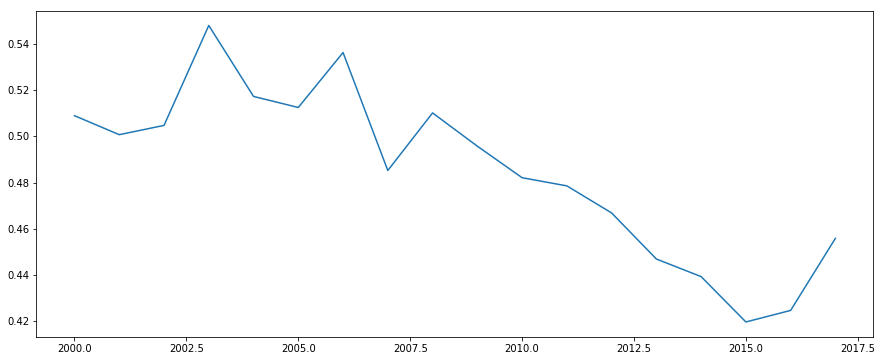

In [46]:
## create space for plot to fill
## create line plot of the ration of rushing to passing yards over time
plt.subplots(figsize = (15, 6))
plt.plot(stat_sum.index, stat_sum.run_rat)

The ratio of rushing to passing yards has decreased over the last 17 years. This may help explain why running back salaries haven't been increasing like the salaries for other positions.

Now I want to start answering my other questions: Which NFL team had the highest output offense (in terms of overall yards gained)? Which quarterbacks held the highest average rating? Did the quarterbacks with the highest ratings also lead high output offenses?

Since all the years except 2000 and 2017 are missing data on what team many players belonged to, I won't be able to accurately compare stats across teams in all years. I'm going to focus on the data for 2017 for this portion of the analysis because it is the most recent and relevent data.

In [47]:
## create 'agg_data' containing the data for 2017 grouped by team and summed over the whole year
agg_data = nfl_stats.loc[nfl_stats.game_year == 2017].groupby('team').sum()

In [48]:
## create 'total_yds' in 'agg_data' which is the sum of rush and pass yards for each team
agg_data['total_yds'] = agg_data['rush_yds'] + agg_data['pass_yds']

In [49]:
## sort 'agg_data' in descending order by 'total_yds'
agg_data = agg_data.sort_values('total_yds', ascending = False)

In [50]:
## make sure 'total_yds' is correct and sorted
agg_data.head()

,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,total_yds
team,,,,,,,,,,,,,,,,,,,,
NE,318686,1340,410.0,1742.0,282.2,15.0,4.0,370.0,4424.0,1278.3,30.0,0.0,547.0,4424.0,30.0,8.0,33.0,3.0,1677.7,6166.0
NO,288431,1207,418.0,1978.0,256.9,22.0,4.0,364.0,4089.0,1223.0,22.0,8.0,506.0,4089.0,22.0,8.0,18.0,0.0,1555.1,6067.0
PHI,334822,1414,455.0,2045.0,281.8,9.0,8.0,318.0,3794.0,1329.0,38.0,3.0,530.0,3794.0,38.0,8.0,33.0,5.0,1783.7,5839.0
PIT,282380,1225,409.0,1543.0,191.1,10.0,3.0,361.0,4295.0,1041.1,28.0,2.0,563.0,4295.0,28.0,14.0,21.0,1.0,1589.0,5838.0
KC,282380,1149,378.0,1793.0,288.8,10.0,2.0,341.0,4042.0,1229.6,26.0,1.0,507.0,4042.0,26.0,7.0,35.0,1.0,1583.9,5835.0


[Text(0,0.5,'Total Offensive Yards'), Text(0.5,0,'Team')]

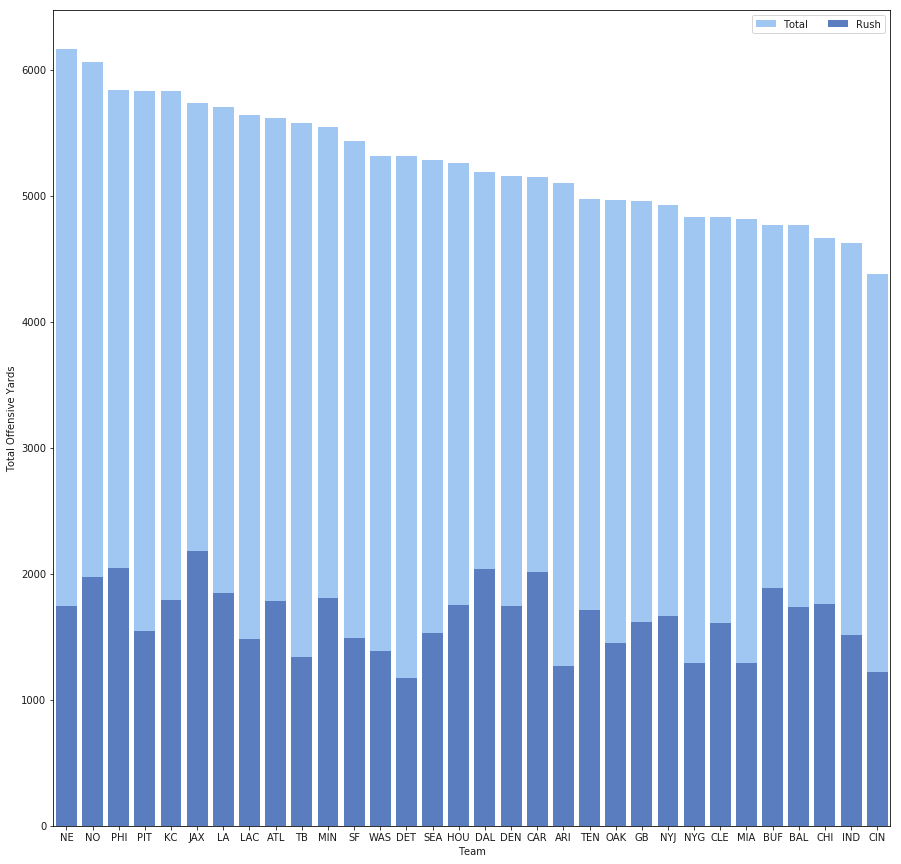

In [51]:
## create larger space for plot to fill
f, ax = plt.subplots(figsize=(15, 15))
## pick color scheme for first overlay of barplot
sns.set_color_codes('pastel')
## create barplot of each team's 'total_yds'
sns.barplot(x = agg_data.index, y = 'total_yds', data = agg_data, label = 'Total', color = 'b')
## pick color scheme for second overlay of barplot
sns.set_color_codes('muted')
## create barplot of each team's 'rush_yds'
sns.barplot(x = agg_data.index, y = 'rush_yds', data = agg_data, label = 'Rush', color = 'b')
## format legend
ax.legend(ncol = 2, loc = 'upper right', frameon = True)
## change y and x axis labels
ax.set(ylabel = 'Total Offensive Yards', xlabel = 'Team')

New England has the highest output offense with New Orleans close behind. The majority of every team's total yardage comes from passing. I want to see which divisions in the NFL are stronger than others in terms of overall offense.

In [52]:
## import data on each team's division
divs = pd.read_csv("C:/Users/camer/Desktop/Machine_Learning/nfl_divisions.csv")

In [53]:
## create 'div_stats' which is 'yearly_stats' with a new variable, 'div'
div_stats = pd.merge(agg_data, divs, on = 'team')

In [54]:
## check that merge performed correctly
div_stats.head()

,team,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,...,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,total_yds,div
0,NE,318686,1340,410.0,1742.0,282.2,15.0,4.0,370.0,4424.0,...,0.0,547.0,4424.0,30.0,8.0,33.0,3.0,1677.7,6166.0,AFC East
1,NO,288431,1207,418.0,1978.0,256.9,22.0,4.0,364.0,4089.0,...,8.0,506.0,4089.0,22.0,8.0,18.0,0.0,1555.1,6067.0,NFC South
2,PHI,334822,1414,455.0,2045.0,281.8,9.0,8.0,318.0,3794.0,...,3.0,530.0,3794.0,38.0,8.0,33.0,5.0,1783.7,5839.0,NFC East
3,PIT,282380,1225,409.0,1543.0,191.1,10.0,3.0,361.0,4295.0,...,2.0,563.0,4295.0,28.0,14.0,21.0,1.0,1589.0,5838.0,AFC North
4,KC,282380,1149,378.0,1793.0,288.8,10.0,2.0,341.0,4042.0,...,1.0,507.0,4042.0,26.0,7.0,35.0,1.0,1583.9,5835.0,AFC West


In [55]:
## create 'agg_div_stats' which contains summed data for each division
agg_div_stats = div_stats.groupby('div').sum()

In [56]:
## view stats for each division
agg_div_stats

,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,total_yds
div,,,,,,,,,,,,,,,,,,,,
AFC East,1167843,5013,1611.0,6590.0,893.3,42.0,18.0,1287.0,14096.0,4500.5,87.0,16.0,2028.0,14096.0,87.0,50.0,151.0,9.0,6219.7,20686.0
AFC North,1236421,5208,1547.0,6113.0,854.4,39.0,21.0,1276.0,13714.0,4550.0,81.0,13.0,2093.0,13714.0,81.0,65.0,130.0,11.0,5934.4,19827.0
AFC South,1153724,4817,1743.0,7168.0,1025.0,53.0,16.0,1150.0,13437.0,4470.8,74.0,10.0,1931.0,13437.0,74.0,53.0,161.0,17.0,5574.9,20605.0
AFC West,1216251,5136,1542.0,6464.0,1031.0,41.0,18.0,1318.0,15138.0,5052.3,90.0,21.0,2118.0,15138.0,90.0,51.0,121.0,7.0,5790.7,21602.0
NFC East,1214234,5174,1638.0,6762.0,989.2,41.0,26.0,1300.0,14424.0,4959.3,105.0,16.0,2076.0,14424.0,105.0,44.0,134.0,20.0,5978.6,21186.0
NFC North,1190030,5077,1571.0,6359.0,924.1,48.0,24.0,1293.0,14133.0,4581.2,87.0,14.0,2005.0,14133.0,87.0,47.0,155.0,17.0,6065.8,20492.0
NFC South,1208183,5224,1649.0,7120.0,1133.9,55.0,24.0,1308.0,15301.0,4960.7,88.0,19.0,2012.0,15301.0,88.0,44.0,112.0,11.0,6100.6,22421.0
NFC West,1252557,5250,1569.0,6142.0,965.7,38.0,25.0,1288.0,15389.0,5595.5,93.0,18.0,2148.0,15389.0,93.0,49.0,159.0,11.0,6197.1,21531.0


In [57]:
## sort 'agg_div_stats' in descending order by 'total_yds'
agg_div_stats = agg_div_stats.sort_values('total_yds', ascending = False)

[Text(0,0.5,'Total Offensive Yards'), Text(0.5,0,'Division')]

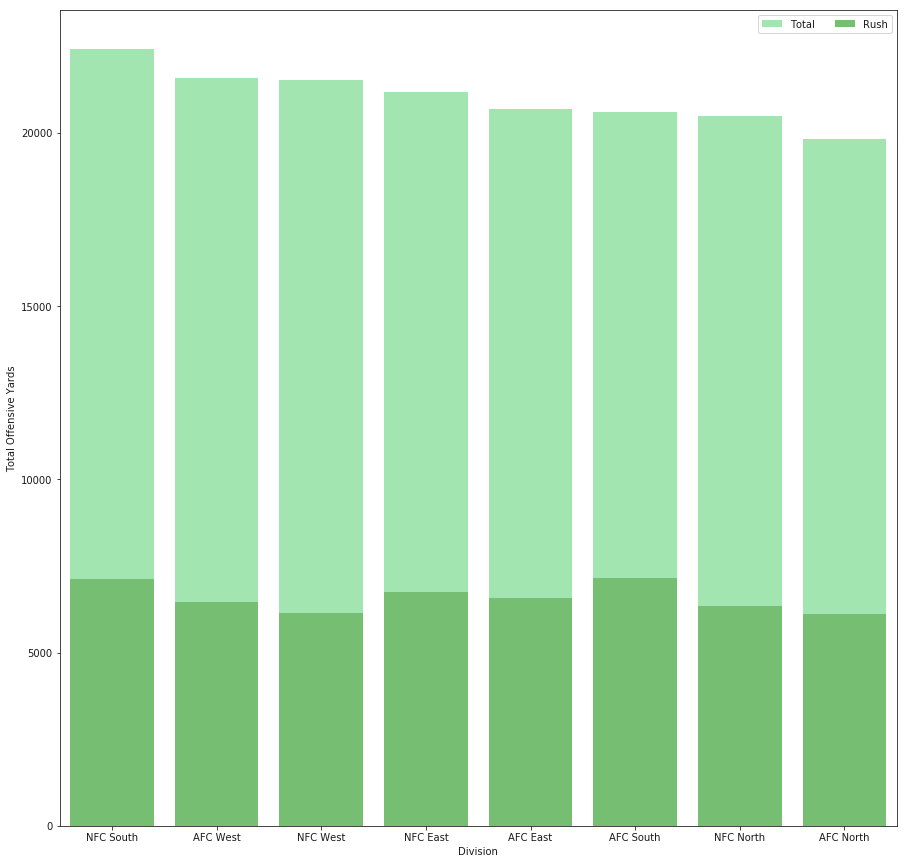

In [58]:
## create larger space for plot to fill
f, ax = plt.subplots(figsize=(15, 15))
## choose color scheme for first barplot
sns.set_color_codes('pastel')
## create barplot of 'total_yds' for each division
sns.barplot(x = agg_div_stats.index, y = 'total_yds', data = agg_div_stats, label = 'Total', color = 'g')
## choose color scheme for second overlay of barplot
sns.set_color_codes('muted')
## create second overlay of barplot showing rush_yds in each division
sns.barplot(x = agg_div_stats.index, y = 'rush_yds', data = agg_div_stats, label = 'Rush', color = 'g')
## format the legend
ax.legend(ncol = 2, loc = 'upper right', frameon = True)
ax.set(ylabel = 'Total Offensive Yards', xlabel = 'Division')

In [59]:
agg_div_stats

,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate,total_yds
div,,,,,,,,,,,,,,,,,,,,
NFC South,1208183,5224,1649.0,7120.0,1133.9,55.0,24.0,1308.0,15301.0,4960.7,88.0,19.0,2012.0,15301.0,88.0,44.0,112.0,11.0,6100.6,22421.0
AFC West,1216251,5136,1542.0,6464.0,1031.0,41.0,18.0,1318.0,15138.0,5052.3,90.0,21.0,2118.0,15138.0,90.0,51.0,121.0,7.0,5790.7,21602.0
NFC West,1252557,5250,1569.0,6142.0,965.7,38.0,25.0,1288.0,15389.0,5595.5,93.0,18.0,2148.0,15389.0,93.0,49.0,159.0,11.0,6197.1,21531.0
NFC East,1214234,5174,1638.0,6762.0,989.2,41.0,26.0,1300.0,14424.0,4959.3,105.0,16.0,2076.0,14424.0,105.0,44.0,134.0,20.0,5978.6,21186.0
AFC East,1167843,5013,1611.0,6590.0,893.3,42.0,18.0,1287.0,14096.0,4500.5,87.0,16.0,2028.0,14096.0,87.0,50.0,151.0,9.0,6219.7,20686.0
AFC South,1153724,4817,1743.0,7168.0,1025.0,53.0,16.0,1150.0,13437.0,4470.8,74.0,10.0,1931.0,13437.0,74.0,53.0,161.0,17.0,5574.9,20605.0
NFC North,1190030,5077,1571.0,6359.0,924.1,48.0,24.0,1293.0,14133.0,4581.2,87.0,14.0,2005.0,14133.0,87.0,47.0,155.0,17.0,6065.8,20492.0
AFC North,1236421,5208,1547.0,6113.0,854.4,39.0,21.0,1276.0,13714.0,4550.0,81.0,13.0,2093.0,13714.0,81.0,65.0,130.0,11.0,5934.4,19827.0


In [60]:
## filter 'div_stats' for teams in NFC south
div_stats[div_stats['div'] == 'NFC South']['team']

1      NO
8     ATL
9      TB
18    CAR
Name: team, dtype: object

New Orleans, Atlanta, Tampa Bay, and Carolina are in the NFC south, the division with the most offensive yards.

Now I want to look at which quarterbacks have the highest ratings and whether top rated quarterbacks lead the teams in the NFC south, the teams with the highest offensive output.

In [61]:
## create 'qbs' which contains data for all the qbs in 2017
qbs = nfl_stats[(nfl_stats['position'] == 'QB') & (nfl_stats['game_year'] == 2017)]

In [62]:
## create 'avg_rates' by grouping the qb data by name, find the avg rating, and sort in descending order by avg_rating
avg_rates = qbs.groupby('name').mean().sort_values('rate', ascending = False)
## view avg_rates to make sure transformation performed correctly
avg_rates.head()

,game_year,game_week,rush_att,rush_yds,rush_avg,rush_tds,rush_fumbles,rec,rec_yds,rec_avg,rec_tds,rec_fumbles,pass_att,pass_yds,pass_tds,int,sck,pass_fumbles,rate
name,,,,,,,,,,,,,,,,,,,
Alex Smith,2017.0,8.400000,4.000000,23.666667,8.800000,0.066667,0.066667,NaN,NaN,NaN,NaN,NaN,33.666667,269.466667,1.733333,0.333333,2.333333,0.066667,105.593333
Tom Brady,2017.0,8.466667,2.083333,2.333333,1.516667,0.000000,0.250000,NaN,NaN,NaN,NaN,NaN,36.266667,292.466667,2.000000,0.533333,2.200000,0.200000,103.973333
Drew Brees,2017.0,8.733333,2.666667,0.833333,0.900000,0.166667,0.000000,NaN,NaN,NaN,NaN,NaN,33.733333,272.600000,1.466667,0.533333,1.200000,0.000000,103.673333
Carson Wentz,2017.0,7.307692,4.923077,23.000000,4.692308,0.000000,0.230769,NaN,NaN,NaN,NaN,NaN,33.846154,253.538462,2.538462,0.538462,2.153846,0.230769,101.869231
Jared Goff,2017.0,8.533333,2.153846,3.923077,2.753846,0.076923,0.230769,NaN,NaN,NaN,NaN,NaN,31.800000,253.600000,1.866667,0.466667,1.666667,0.200000,101.686667


In [63]:
## create 'top_rated', which contains the rows with the top 5 rated quarterbacks
top_rated = avg_rates[:5]

In [64]:
## create 'top_5_full', which is the full nfl_stats data filtered for the quarterbacks in top_rated
top_5_full = nfl_stats.loc[(nfl_stats.name.isin(top_rated.index)) & (nfl_stats.game_year == 2017)]

In [65]:
## merge the div data with top_5_full to attach divisions to players
top_5_full = pd.merge(top_5_full, divs, on = 'team')

In [66]:
## get the unique divisions from the top_5_full data
top_5_full['div'].unique()

array(['NFC East', 'AFC West', 'NFC West', 'AFC East', 'NFC South'],
      dtype=object)

Out of the top rated quarterbacks, only 1 of them leads a team in the division with the highest offensive output. There are definitely other factors that lead to gaining a lot of yards other than the quarterback that is leading the offense.

Overall, New England had the highest output offense in the NFL in 2017. They also had the second highest rated quarterback, Tom Brady. The NFC South had the highest amount of yards as a division, but the teams in the NFC South are spread out across the distribution of NFL teams when ordered by total yards. Out of the teams in the NFC South, only 1 is lead by a top rated quarterback.

Next I'll analyze my third dataset.

In [67]:
## use pandas to read in 'travel_data'
travel_data = pd.read_excel("C:/Users/camer/Desktop/mbta.xlsx")

In [68]:
## view data to make sure it read in correctly
travel_data

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,All Modes by Qtr,NaN,NaN,1187.653,NaN,NaN,1245.959,NaN,NaN,1256.571,...,NaN,NaN,1223.452,NaN,NaN,1302.414,NaN,NaN,1290.549,NaN
2,Boat,4.000,3.600,40.000,4.300,4.900,5.800,6.521,6.572,5.469,...,3.140,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,372.598,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.200,138.500,137.700,139.500,139.000,143.000,142.391,142.364,143.051,...,128.396,125.463,134.374,134.169,136.140,135.581,132.410,130.616,136.901,128.720
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,499.566,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
6,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,265.748,...,198.450,219.886,227.935,242.280,225.776,221.865,231.010,220.164,244.949,237.768
7,Pct Chg / Yr,0.020,-0.040,0.114,-0.002,0.049,0.096,-0.037,0.004,-0.007,...,-0.028,0.008,0.050,0.036,0.050,0.054,0.067,0.052,0.043,0.032
8,Private Bus,4.772,4.417,4.574,4.542,4.768,4.722,3.936,3.946,4.329,...,2.213,2.570,2.559,2.762,2.776,2.815,2.671,2.655,2.843,2.967
9,RIDE,4.900,5.000,5.500,5.400,5.400,5.600,5.253,5.308,5.609,...,6.735,7.463,8.387,8.145,8.059,8.377,7.902,8.071,8.318,8.598
10,Trackless Trolley,12.757,12.913,13.057,13.444,13.479,13.323,13.311,13.142,14.393,...,11.104,11.695,12.601,12.599,12.291,12.128,11.060,11.091,12.332,12.297


This data comes from the Massachusets Bay Transit Authority (MBTA), and contains the average number of trips per day that each mode of transportation was utilized for over each month. I want to see which mode of transportation has had the largest average percentage increase in number of trips over the time frame of the data. This would be useful if you were a city planner or government official trying to determine which mode of transportation to invest expansion money into based on how many trips people are taking using that mode of transportation. I'll start by cleaning the data.

The data looks pretty clean, except for the 'All Modes by Qtr' variable, which is full of NA values, and I don't think will be useful for the analysis. The 'Pct Chg/Yr' variable is ambiguous as to what it pertains to, so I will drop the 'All Modes by Qtr' and 'Pct Chg/Yr' variables.

In [69]:
## remove 'all modes by quarter' and 'Pct Chg/Yr' row
travel_data = travel_data.drop([1, 7, 11], axis = 0)

In [70]:
## view data
travel_data

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
2,Boat,4.000,3.600,40.000,4.300,4.900,5.800,6.521,6.572,5.469,...,3.140,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,372.598,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.200,138.500,137.700,139.500,139.000,143.000,142.391,142.364,143.051,...,128.396,125.463,134.374,134.169,136.140,135.581,132.410,130.616,136.901,128.720
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,499.566,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
6,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,265.748,...,198.450,219.886,227.935,242.280,225.776,221.865,231.010,220.164,244.949,237.768
8,Private Bus,4.772,4.417,4.574,4.542,4.768,4.722,3.936,3.946,4.329,...,2.213,2.570,2.559,2.762,2.776,2.815,2.671,2.655,2.843,2.967
9,RIDE,4.900,5.000,5.500,5.400,5.400,5.600,5.253,5.308,5.609,...,6.735,7.463,8.387,8.145,8.059,8.377,7.902,8.071,8.318,8.598
10,Trackless Trolley,12.757,12.913,13.057,13.444,13.479,13.323,13.311,13.142,14.393,...,11.104,11.695,12.601,12.599,12.291,12.128,11.060,11.091,12.332,12.297


In [71]:
## check number of entries in each column and data types
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 10
Data columns (total 59 columns):
mode       8 non-null object
2007-01    8 non-null float64
2007-02    8 non-null float64
2007-03    8 non-null float64
2007-04    8 non-null float64
2007-05    8 non-null float64
2007-06    8 non-null float64
2007-07    8 non-null float64
2007-08    8 non-null float64
2007-09    8 non-null float64
2007-10    8 non-null float64
2007-11    8 non-null float64
2007-12    8 non-null float64
2008-01    8 non-null float64
2008-02    8 non-null float64
2008-03    8 non-null float64
2008-04    8 non-null float64
2008-05    8 non-null float64
2008-06    8 non-null float64
2008-07    8 non-null float64
2008-08    8 non-null float64
2008-09    8 non-null float64
2008-10    8 non-null float64
2008-11    8 non-null float64
2008-12    8 non-null float64
2009-01    8 non-null float64
2009-02    8 non-null float64
2009-03    8 non-null float64
2009-04    8 non-null float64
2009-05    8 non-null float64

There aren't any missing values.

In [72]:
## check out quantiles and min/max values. Looks like there aren't any outliers
travel_data.describe()

,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,145.871625,148.954750,155.090625,155.888250,155.594375,155.766000,155.494000,152.915375,163.845375,155.556500,...,144.176750,152.582875,160.832375,164.160375,162.860500,161.510625,160.763375,155.158500,168.594250,168.527750
std,170.757685,175.368917,174.217139,184.236392,184.521361,184.243045,183.868253,180.510410,194.571272,182.071364,...,177.831443,189.740777,198.219496,201.973321,201.751041,200.424681,199.673901,191.445929,208.740849,211.410366
min,4.000000,3.600000,4.574000,4.300000,4.768000,4.722000,3.936000,3.946000,4.329000,4.315000,...,2.213000,2.570000,2.559000,2.762000,2.776000,2.815000,2.671000,2.655000,2.843000,2.967000
25%,4.868000,4.854250,11.167750,5.185500,5.275000,5.750000,6.204000,6.256000,5.574000,5.640750,...,5.836250,6.418250,7.208750,7.171500,7.152000,7.651250,7.571750,7.736500,7.489250,7.569500
50%,77.478500,75.706500,88.850000,76.472000,76.239500,78.161500,77.851000,77.753000,78.722000,80.582000,...,69.750000,68.579000,73.487500,73.384000,74.215500,73.854500,71.735000,70.853500,74.616500,70.508500
75%,254.378000,264.865250,266.049750,279.708250,274.788250,272.216750,271.844250,265.050000,292.460500,273.287250,...,232.577000,251.473000,266.051000,276.821500,265.654250,260.478000,263.653750,253.571250,280.779500,277.940000
max,435.294000,448.271000,458.583000,472.201000,474.579000,477.032000,471.735000,461.605000,499.566000,457.741000,...,468.418000,504.068000,516.730000,528.631000,528.122000,529.528000,532.888000,508.145000,550.137000,554.932000


I need to reshape my data so that each mode of transportation is a variable, and there is one variable for the date.

In [73]:
## use pd.melt to reshape data before graphing
travel_data2 = pd.melt(travel_data, id_vars = 'mode')

In [74]:
## use .pivot to reshape data
travel_data2 = travel_data2.pivot_table(values = 'value', index = 'variable', columns = 'mode')

I want to visualize the average number of trips per day that each mode of transportation makes over time.

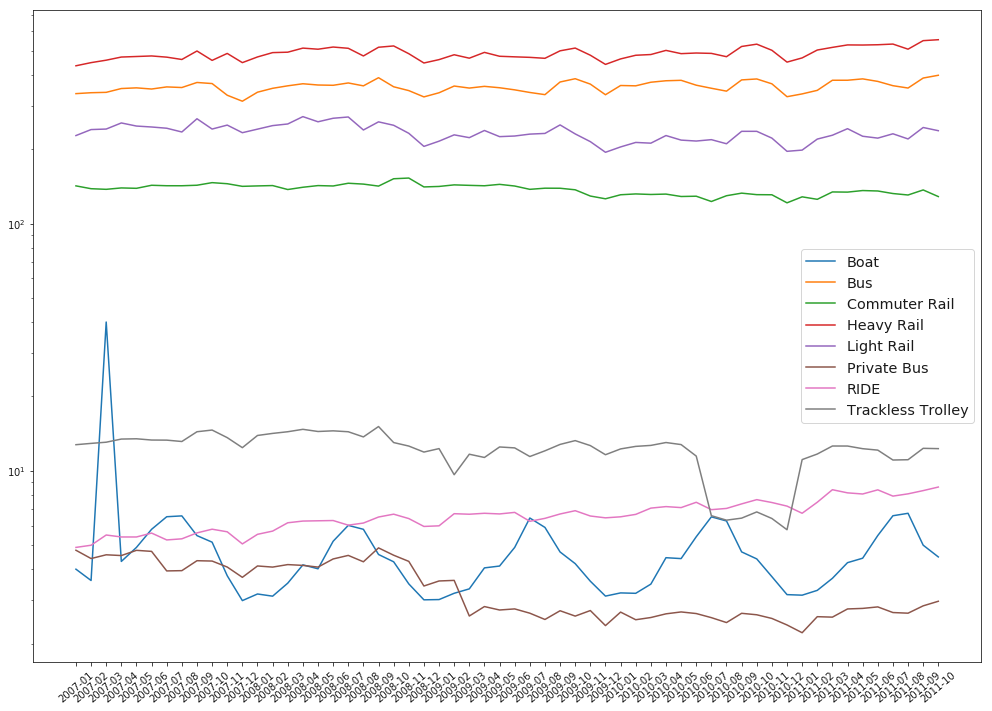

In [75]:
## create larger space for plot to fill
## create mode_columns containing the column names of travel_data2
## create a for loop which graphs a line plot showing the average number of daily trips per month for each transportation type
## format the legend location and size
## change y-scale to log for better visualization
## rotate x-labels for easier reading
plt.subplots(figsize = (17, 12))
mode_columns = list(travel_data2)
for mode in mode_columns:
    plt.plot(travel_data2.index, travel_data2[mode], label = mode)
plt.legend(loc = 'best', fontsize = 'x-large')
plt.yscale('log')
ticks = plt.xticks(rotation = 40)

Viewing the trips over time for boats, it looks like there may be an outlier. I believe it may be a typo, which got entered as 40 trips instead of 4. I'm going to change the value to 4 and regraph to see if it better fits the trend over time of boat trips per day.

In [76]:
## change the outlier entry to a 4
travel_data2.Boat.iloc[2] = 4

Now I will recreate the line graph to visualize the new boat value in relation to the other values.

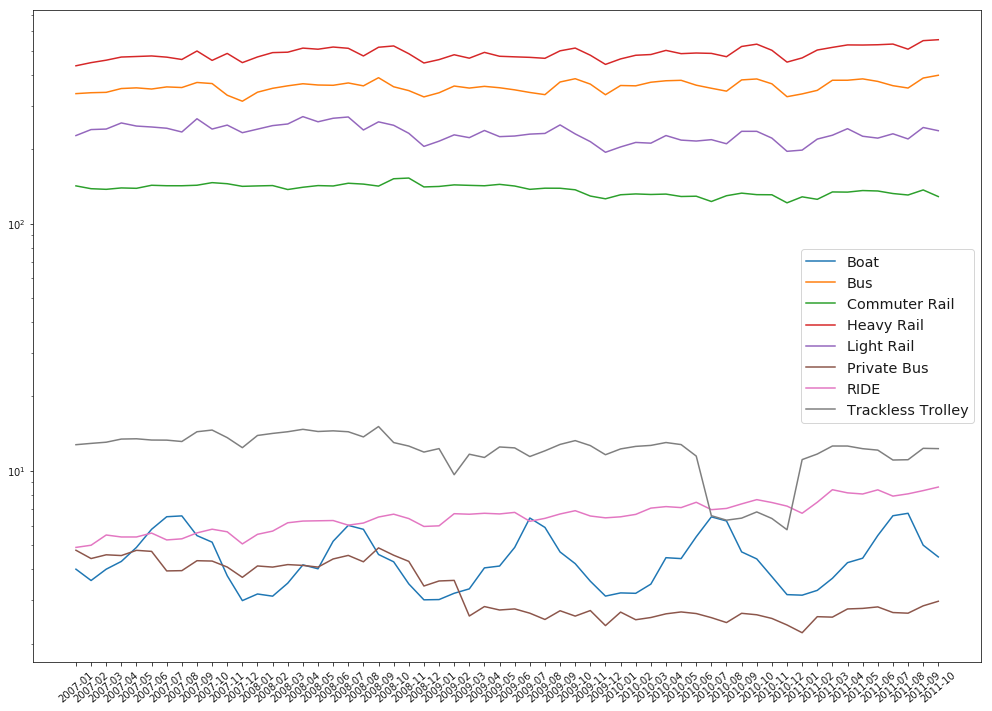

In [77]:
## create larger space for plot to fill
## create mode_columns containing the column names of travel_data2
## create a for loop which graphs a line plot showing the average number of daily trips per month for each transportation type
## format the legend location and size
## change y-scale to log for better visualization
## rotate x-labels for easier reading
plt.subplots(figsize = (17, 12))
mode_columns = list(travel_data2)
for mode in mode_columns:
    plt.plot(travel_data2.index, travel_data2[mode], label = mode)
plt.legend(loc = 'best', fontsize = 'x-large')
plt.yscale('log')
ticks = plt.xticks(rotation = 40)

The new value seems to fit the overall trend much better.

Now I want to create a new variable representing the average monthly percent change in the average number of daily trips for each transportation type. I'm going to do it using the original travel_data dataframe because it's layout will make the calculation easier. I'll calculate the average monthly percent change using the formula (Xt+n/Xt)^(1/n)-1 * 100

In [78]:
## create the 'avg_mnth_pct_chg' variable, which is the average montly pct change in the average number of trips each mode makes
travel_data['avg_mnth_pct_chg'] = (((travel_data['2011-10'] / travel_data['2007-01']) ** (1 / (len(travel_data.columns.values) - 1))) - 1) * 100

In [79]:
## find the mode of transportation that had the lowest average montly percent change
travel_data.loc[travel_data.avg_mnth_pct_chg == travel_data.avg_mnth_pct_chg.min()]

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,avg_mnth_pct_chg
8,Private Bus,4.772,4.417,4.574,4.542,4.768,4.722,3.936,3.946,4.329,...,2.57,2.559,2.762,2.776,2.815,2.671,2.655,2.843,2.967,-0.815987


Private buses have seen a decrease in the average number of trips they make per day, with an average decrease of -0.8% per month.

In [80]:
## find the mode of transportation that had the lowest average monthly percent change
travel_data.loc[travel_data.avg_mnth_pct_chg == travel_data.avg_mnth_pct_chg.max()]

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,avg_mnth_pct_chg
9,RIDE,4.9,5.0,5.5,5.4,5.4,5.6,5.253,5.308,5.609,...,7.463,8.387,8.145,8.059,8.377,7.902,8.071,8.318,8.598,0.974188


RIDE is the Massachusetts Bay Transportation Authority's paratransit program for people with physical, mental or cognitive disabilities. These people are ones that typically find it difficult to navigate standard public transportation systems. RIDE has seen an average increase of 0.95% per month in the number of trips it makes.

RIDE seems to be a transportation system that is increasing in popularity and may be worth investing more time into expanding and making it more readily available for people with disabilities. Private buses have seen the largest percentage decrease in the number of trips they make per day.